In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
import numpy as np
from fitters import *
from tools import *
from plots import *
from trainer import *
from results import Results
set_seaborn()
FIG_SIZE = (12, 6)
sns.set_theme(rc={'figure.figsize': FIG_SIZE})


In [32]:
resPH, stimPH = read_lmc('PHOTO')
res1, stim3 = read_lmc('LMC-BG1')
res2, stim3 = read_lmc('LMC-BG2')
res3, stim3 = read_lmc('LMC-BG3')
res4, stim4 = read_lmc('LMC-BG4')
res5, stim5 = read_lmc('LMC-BG5')
res6, stim6 = read_lmc('LMC-BG6')

TIME = 1.0
all_results = []

In [40]:
data_str = 'LMC-BG1'
d_method = 'mean'
dt_ms = 2.0
lag_ms = 100
factor, dim = convert_dtms_windowms_to_factor_dim(dt_ms, lag_ms)
betas = np.arange(0,2,0.01)
X = preprocess(resPH, factor=factor, method=d_method) 
Y = preprocess(res1, factor=factor, method=d_method) 

time_str = f'dT={dt_ms}ms, W={lag_ms}ms'
title = f'{data_str} [{time_str}]'


# model = ConstantModel(f'Constant d=1 {title}')
# res = train_test_method(X, Y, model, 1, betas=betas)
# C2_Results = Results(model.name, *res)

model = LinearModel(f'Linear {title}')
res = train_test_method(X, Y, model, dim, betas=betas)
Lin50_Results = Results(model.name, *res)

# model = EigenModel(f'Eigen {title}')
# res = train_test_method(X, Y, model, dim, betas=betas)
# Eig_Results = Results(model.name, *res)

# model = EigenCShiftModel(f'EigenCShiftModel {title}')
# res = train_test_method(X, Y, model, dim, betas=betas)
# EigenCShiftModel_res = Results(model.name, *res)

# model = EigenCShiftTimeModel(f'EigenCShiftTimeModel {title}', window_factor=2.0)
# res = train_test_method(X, Y, model, dim, betas=betas)
# EigenCShiftTimeModel_res = Results(model.name, *res)

# cur_results = [C2_Results, Lin50_Results, Eig_Results, EigenCShiftModel_res, EigenCShiftTimeModel_res]
cur_results = [Lin50_Results]
all_results.extend(cur_results)




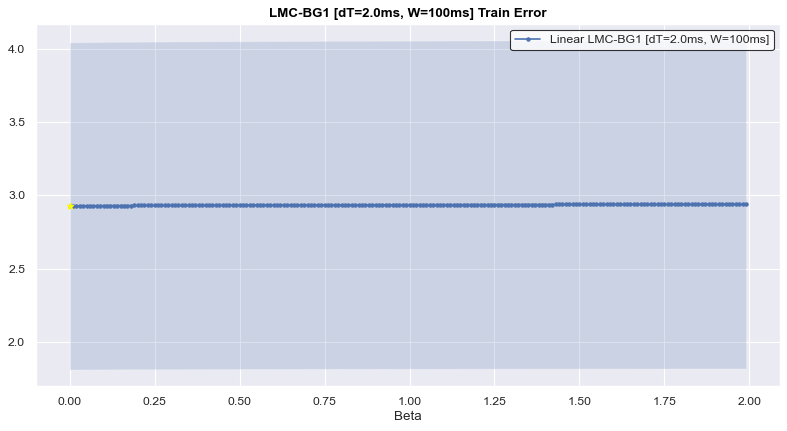

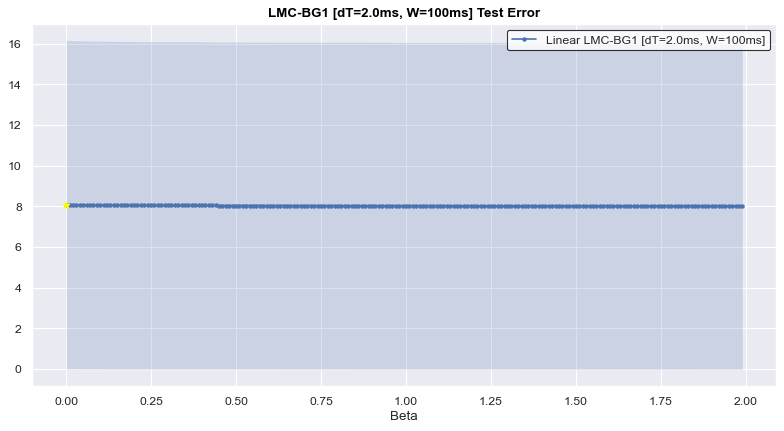

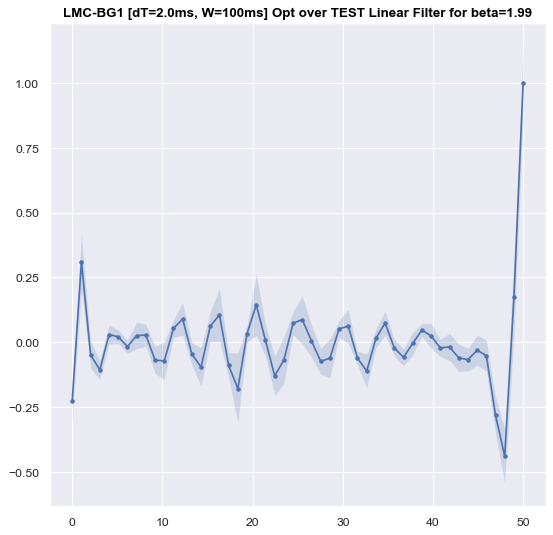

In [41]:
# plotting
plot_beta_errs(cur_results, title=title)
# plot_params(Lin50_Results.get_params(), title=f'{title} Linear Params')
# plot_params(Eig50_Results.get_params(), title=f'{title} Eig Params')
# plot_params(C2_Results.get_params(), title=f'{title} Const Params')
# plot_filter(*Lin50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Linear')
# plot_filter(*Eig50_Results.get_opt_filter(opt_set='train'), title=f'{title} Opt over TRAIN Eig')
plot_filter(*Lin50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Linear')
# plot_filter(*Eig50_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST Eig')
# plot_filter(*EigenCShiftModel_res.get_opt_filter(opt_set='test'), title=f'"{title} Opt over TRain EigC')
# plot_filter(*EigenCShiftTimeModel_res.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST EigC-Window')
# plot_filter(*DMD_Results.get_opt_filter(opt_set='test'), title=f'{title} Opt over TEST DMD')
# plot_self_corr(X, dim, title=title)

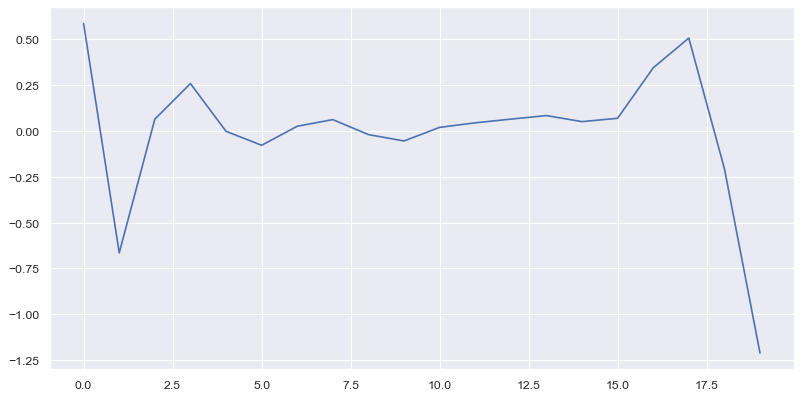

In [24]:
plt.plot(Lin50_Results.filters[5][0])